In [1]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from Wrapper_FS import *
from hybrid_FS import *

np.random.seed(1)
random.seed(1)

/Users/dormann/Documents/GitHub/src


# Baseline with preselected genes for AE4

In [2]:
#Load preprocess data
AE4 = np.array(pd.read_csv ('../data/processed_data/AE4intron.csv'))
y = np.array(AE4[:,-1],dtype=int)
AE4 = AE4[:,0:-1]

In [6]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4,y,4)

In [7]:
print(AE4.shape, len(pred))
acc = model.score_
print(acc)

(1469, 10975) 1469
0.06652512384996462


In [8]:
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

sensitivity, specificity, precision, NPV, FDR, FNR =  (94.0, 1319.0, 0.0712661106899166, 0.12384716732542819, 0.9963754674932469, 0.06652512384996462, 0.9981693300849266, 0.9334748761500354, 0.8761528326745718)


# Filter methods

# Mutual information maximizer (MIM)

[   30   124   125   255   329   371   449   453   458   550   582   674
   741   769   778   939  1024  1062  1094  1111  1112  1256  1259  1282
  1351  1354  1358  1402  1482  1487  1515  1739  1744  1943  2001  2129
  2172  2354  2361  2450  2505  2526  2586  2593  2634  2783  2857  2998
  3087  3094  3208  3218  3254  3331  3401  3410  3423  3430  3444  3454
  3460  3463  3467  3473  3488  3495  3502  3515  3524  3526  3527  3543
  3557  3563  3591  3613  3628  3633  3634  3639  3647  3653  3679  3685
  3724  3730  3743  3754  3785  3790  3791  3793  3796  3798  3800  3810
  3812  3815  3824  3834  3846  3855  3868  3876  3915  3929  3962  4011
  4082  4191  4248  4261  4461  4496  4506  4563  4569  4582  4676  4677
  4707  4722  4830  4873  4897  4955  4956  4966  4979  4997  5044  5115
  5120  5121  5238  5269  5273  5286  5293  5332  5416  5473  5487  5602
  5653  5685  5705  5709  5877  5953  5996  6139  6160  6185  6191  6215
  6216  6308  6333  6454  6457  6496  6524  6533  6

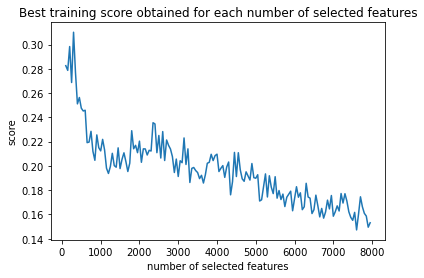

In [9]:
N = np.arange(100,8000,50)
best_subset, best_score = MIM(y, AE4, FamiliesClusters, compute_sensitivity,True,N, 3, plot=True)
print(best_subset, best_score)

In [10]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

300
sensitivity, specificity, precision, NPV, FDR, FNR =  (254.0, 1174.0, 0.21635434412265758, 0.31013431013431014, 0.9965349413094616, 0.17787114845938376, 0.9983294007723195, 0.8221288515406162, 0.6898656898656899)


# Mutual information feature selection (MIFS)


In [ ]:
N = np.arange(100,8000,50)
best_subset, best_score = MIFS(y, AE4, FamiliesClusters, compute_precision,True,N, 1, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Joint Mutual Information (JMI)

In [ ]:
N = np.arange(100,8000,50)
best_subset, best_score = JMI(y, AE4, FamiliesClusters, compute_precision ,True, N, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Double input symmetrical relevance (DISR)

In [ ]:
N = np.arange(100,8000,50)
best_subset, best_score = DISR(y, AE4, FamiliesClusters, compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# ANOVA

In [ ]:
N = np.arange(100,8000,50)
best_subset, best_score = ANOVA(y, AE4, FamiliesClusters, compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Fisher's score

In [ ]:
N = np.arange(100,10000,50)
best_subset, best_score = fishers_score(y, AE4, FamiliesClusters,compute_precision,True,N, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Laplacian score

In [ ]:
N = np.arange(100,10000,50)
best_subset, best_score = laplacian_score(y, AE4, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# ReliefF algorithm

In [ ]:
N = np.arange(100,10000,50)
best_subset, best_score = reliefF(y, AE4, FamiliesClusters,compute_precision,True, N, 5, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Fast Correlation Based Filter algorithm (FCBF)

In [ ]:
N = np.arange(100,10000,50)
best_subset, best_score = FCBF(y, AE4, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Hilbert Schmidt Independence Criterion Lasso (HSIC Lasso)

In [ ]:
N = np.arange(100,10000,50)
best_subset, best_score = HsicLasso(y, AE4, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Wrapper methods

# Stochastic optimization of features selection 

In [ ]:
best_subset, best_score  = hillclimbing(y, AE4, FamiliesClusters, compute_sensitivity,True, 1000, 0.1, True)
print(best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Stimulated annealing

In [ ]:
best_subset, best_score  = stimulated_annealing(y,AE4, FamiliesClusters, compute_precision,True, 200, 0.1, 1, True)
print(best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Genetic feature selection algorithm

In [ ]:
best_subset, best_score  = genetic_fs(y,AE4,FamiliesClusters, compute_precision,True, 300, 0.5, 0.2, 50, 3, True)
print(best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Hybrid methods

# Mutual information and stimmulated annealing

In [ ]:
best_subset, best_score = MI_stimulated_annealing(y,AE4, FamiliesClusters, compute_sensitivity,True, np.array([400]), 3, 800, 0.1, 1, True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate 
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Mutual information and genetic feature selection

In [ ]:
best_subset, best_score = MI_genetic_fs(y,AE4, FamiliesClusters, compute_sensitivity,True, np.array([850]), 3,  100, 0.5, 0.2, 40, 3, True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Best method = 